## Kwadratury Gaussa 

#### Zadanie 1
Zaimplementuj całkowanie metodą Gaussa-Legendra stopnia 2 - 5.

Wyznaczyć wartości całek dla funkcji:

- $f(x) = 3x^3 - 1$ 
- $f(x) = 2 * x^2$
- $f(x) = 4*sin(x)$ 

Oczywiście, oblicz dokładne wartości całek oznaczonych! Porównać dokładność uzyskanych rezultatów z dokładnym wynikiem oraz z kwadraturami z poprzedniego ćwiczenia.

In [10]:
import numpy as np
from scipy.special import roots_legendre
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tabulate import tabulate


# Rectangular
def rectangular_rule(function, a, b, n ):
    total = 0.0
    step = float(b - a) / n
    for i in range(0, n):
        total += function(a + i * step)
    return step * total

# Trapezoidal
def trapezoidal_rule(function, a, b, n):
    total = 0.0
    step = float(b - a) / n
    total += function(a) / 2
    total += function(b) / 2
    for i in range (1, n):
        total += function(a + i * step )
    return step * total
    
# Simpson
def simpsone_rule(function, a , b, n):
    total = 0.0
    step = float(b - a) / n
    x = a + step
    for i in range(1, int(n / 2 + 1)):
        total += 4 * function(x)
        x += 2 * step
    x = a + 2 * step
    for i in range(1, int(n / 2)):
        total += 2 * function(x)
        x += 2 * step
    return step / 3 * (function(a) + function(b) + total)

# Gauss-Legrange
def gauss_legendre_rule(fun, a, b, n):
    [x, w] = roots_legendre(n+1)
    g = 0.5 * (b - a)
    h = 0.5 * (b - a) * x + 0.5 * (b + a)
    integral = g * sum(w * np.vectorize(fun)(h))
    return integral


# Comparison
f1 = lambda x: 3 * x**3 - 1
f2 = lambda x: 2 * x**2
f3 = lambda x: 4 * math.sin(x)

def draw_diagram(function, a, b, i, function_name):
  domain = np.linspace(a, b, i)
  values = np.vectorize(function)(domain)
  plt.plot(domain, values, label = function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()

def calculate_integral(function, a, b, i, function_name):
  draw_diagram(function, a, b, i, function_name)
  rec_value = rectangular_rule(function, a, b, i)
  trap_value = trapezoidal_rule(function, a, b, i)
  simpson_value = simpsone_rule(function, a, b, i)
  scipy_value = integrate.quad(function, a, b)[0]

  gauss_legendre_values = [gauss_legendre_rule(function, a, b, n) for n in range (2, 6)]
  table_gauss_legendre = [[f"Gauss-Legendre (degree: {n+2})", gauss_legendre_values[n], scipy_value,
                           abs(gauss_legendre_values[n] - scipy_value) / abs(scipy_value)] for n in range (len(gauss_legendre_values))]

  
  
  table = [
           ["Rectangular", rec_value, scipy_value, abs(rec_value - scipy_value) / abs(scipy_value)],
           ["Trapezoidal", trap_value, scipy_value, abs(trap_value - scipy_value) / abs(scipy_value)],
           ["Simpson",   simpson_value,  scipy_value, abs(simpson_value - scipy_value) / abs(scipy_value)]
  ]

  table += table_gauss_legendre

  print(tabulate(table, headers=['method', 'value', 'scipy value', 'realtive error'], floatfmt=".10f"), "\n")

def integral_comparison(a, b, i):
  calculate_integral(f1, a, b, i, "f(x) = 3x^3 - 1")
  calculate_integral(f2, a, b, i, "f(x) = 2 * x^2")
  calculate_integral(f3, a, b, i, "f(x) = 4 * sin(x)")

#     (0, 10)

### 2 steps

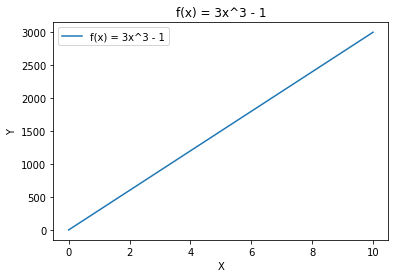

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 1865.0000000000  7490.0000000000      0.7510013351
Trapezoidal                 9365.0000000000  7490.0000000000      0.2503337784
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 250.0000000000  666.6666666667      0.6250000000
Trapezoidal                 750.0000000000  666.66666666

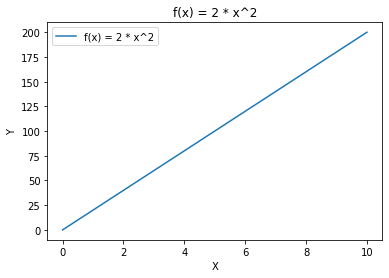

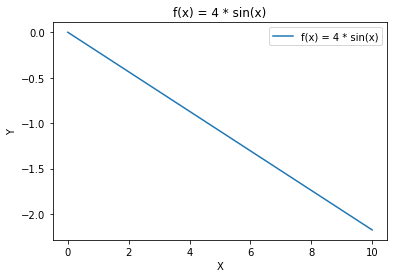

In [11]:
integral_comparison(0, 10, 2)


### 8 steps

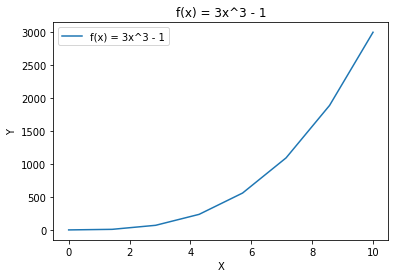

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 5732.1875000000  7490.0000000000      0.2346879172
Trapezoidal                 7607.1875000000  7490.0000000000      0.0156458611
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 546.8750000000  666.6666666667      0.1796875000
Trapezoidal                 671.8750000000  666.66666666

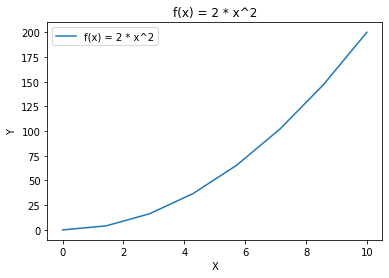

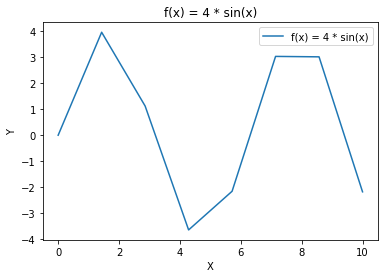

In [12]:
integral_comparison(0, 10, 8)


### 12 steps

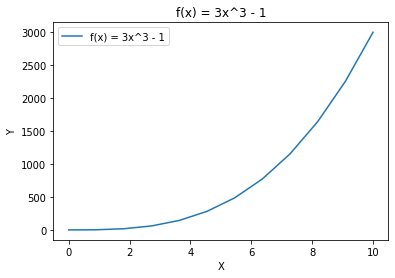

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 6292.0833333333  7490.0000000000      0.1599354695
Trapezoidal                 7542.0833333333  7490.0000000000      0.0069537161
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 585.6481481481  666.6666666667      0.1215277778
Trapezoidal                 668.9814814815  666.66666666

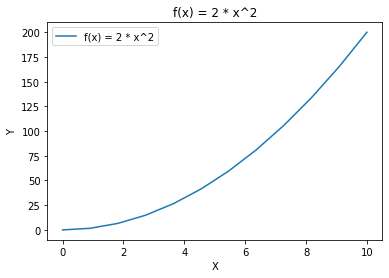

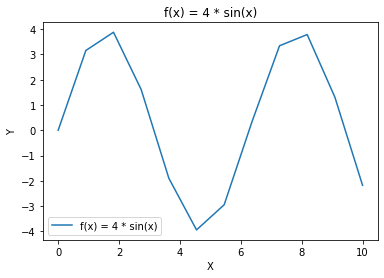

In [13]:
integral_comparison(0, 10, 12)

### 24 steps

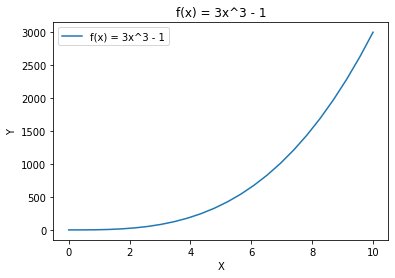

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 6878.0208333333  7490.0000000000      0.0817061638
Trapezoidal                 7503.0208333333  7490.0000000000      0.0017384290
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 625.5787037037  666.6666666667      0.0616319444
Trapezoidal                 667.2453703704  666.66666666

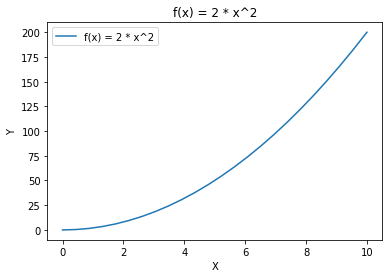

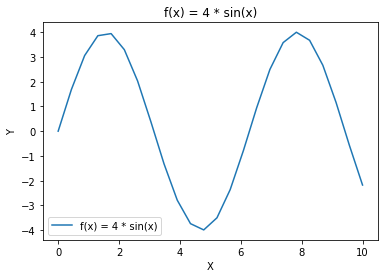

In [14]:
integral_comparison(0, 10, 24)

### 48 steps

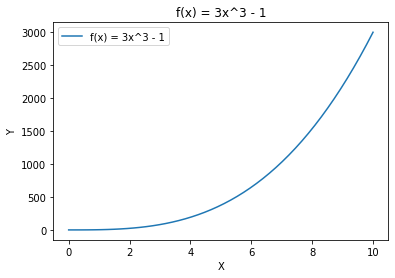

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 7180.7552083333  7490.0000000000      0.0412876891
Trapezoidal                 7493.2552083333  7490.0000000000      0.0004346073
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 645.9780092593  666.6666666667      0.0310329861
Trapezoidal                 666.8113425926  666.66666666

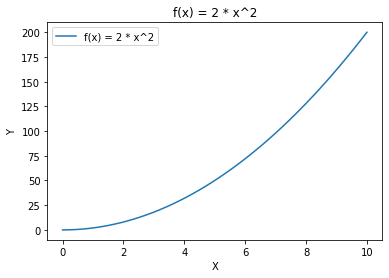

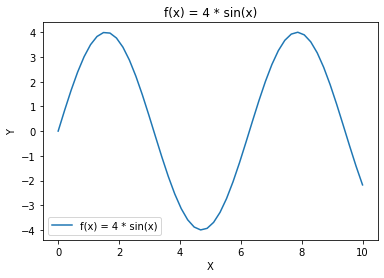

In [15]:
integral_comparison(0, 10, 48)

### 96 steps

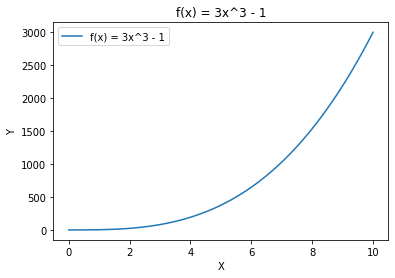

method                                value      scipy value    realtive error
--------------------------  ---------------  ---------------  ----------------
Rectangular                 7334.5638020833  7490.0000000000      0.0207524964
Trapezoidal                 7490.8138020833  7490.0000000000      0.0001086518
Simpson                     7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 2)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 3)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 4)  7490.0000000000  7490.0000000000      0.0000000000
Gauss-Legendre (degree: 5)  7490.0000000000  7490.0000000000      0.0000000000 

method                               value     scipy value    realtive error
--------------------------  --------------  --------------  ----------------
Rectangular                 656.2861689815  666.6666666667      0.0155707465
Trapezoidal                 666.7028356481  666.66666666

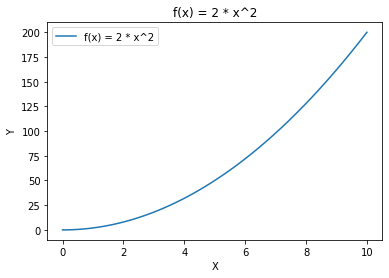

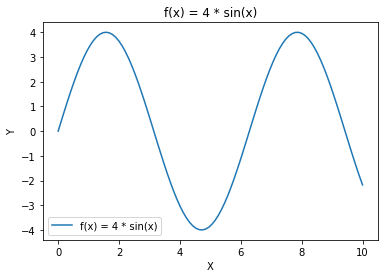

In [16]:
integral_comparison(0, 10, 96)






# (-25, 25)

###  2 steps

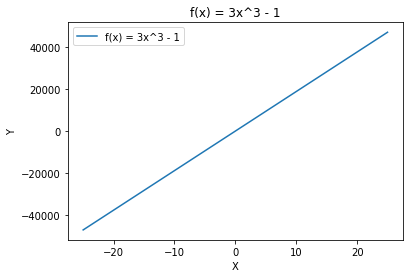

method                                    value     scipy value    realtive error
--------------------------  -------------------  --------------  ----------------
Rectangular                 -1171925.0000000000  -50.0000000000  23437.5000000000
Trapezoidal                      -50.0000000000  -50.0000000000      0.0000000000
Simpson                          -50.0000000000  -50.0000000000      0.0000000000
Gauss-Legendre (degree: 2)       -50.0000000000  -50.0000000000      0.0000000000
Gauss-Legendre (degree: 3)       -50.0000000000  -50.0000000000      0.0000000000
Gauss-Legendre (degree: 4)       -50.0000000000  -50.0000000000      0.0000000000
Gauss-Legendre (degree: 5)       -50.0000000000  -50.0000000000      0.0000000000 

method                                 value       scipy value    realtive error
--------------------------  ----------------  ----------------  ----------------
Rectangular                 31250.0000000000  20833.3333333333      0.5000000000
Trapezoidal      

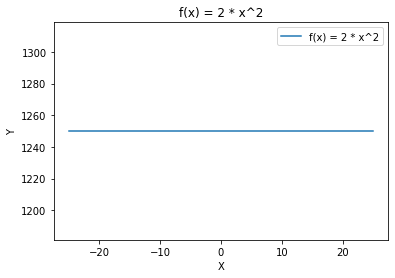

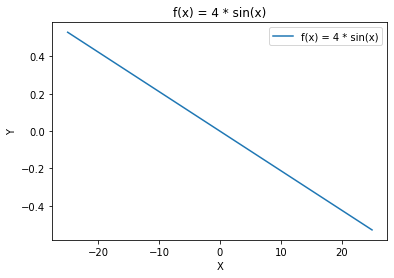

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in double_scalars


ZeroDivisionError: float division by zero

In [17]:
integral_comparison(-25, 25, 2)


### 8 steps

In [ ]:
integral_comparison(-25, 25, 8)


### 12 steps

In [ ]:
integral_comparison(-25, 25, 12)

### 24 steps

In [ ]:
integral_comparison(-25, 25, 24)

### 48 steps

In [ ]:
integral_comparison(-25, 25, 48)

### 96 steps

In [ ]:
integral_comparison(-25, 25, 96)

### 192 steps

In [ ]:
integral_comparison(-25, 25, 192)

### 384 steps

In [ ]:
integral_comparison(-25, 25, 384)




# (-100, 100)

###  2 steps

In [ ]:
integral_comparison(-50, 50, 2)


### 8 steps

In [ ]:
integral_comparison(-50, 50, 8)


### 12 steps

In [ ]:
integral_comparison(-50, 50, 12)

### 24 steps

In [ ]:
integral_comparison(-50, 50, 24)

### 48 steps

In [ ]:
integral_comparison(-50, 50, 48)

### 96 steps

In [ ]:
integral_comparison(-50, 50, 96)

### 192 steps

In [ ]:
integral_comparison(-50, 50, 192)

### 384 steps

In [ ]:
integral_comparison(-50, 50, 384)

#### Zadanie 2 (dla chętnych)
Zaimplementować pozostałe postacie (wystarczy jedną) kwadratury Gaussa (-Czebyszewa, -Laguerre, -Hermite)